In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import os 

In [2]:
os.getcwd()

'/Users/yusufsmacbookpro/Desktop/Springboard/Capstone1'

In [3]:
df = pd.read_csv('/Users/yusufsmacbookpro/Desktop/Top250.csv')

In [4]:
df.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


In [5]:
df.dtypes

Rank                 int64
Restaurant          object
Content             object
Sales                int64
YOY_Sales           object
Units                int64
YOY_Units           object
Headquarters        object
Segment_Category    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              250 non-null    int64 
 1   Restaurant        250 non-null    object
 2   Content           33 non-null     object
 3   Sales             250 non-null    int64 
 4   YOY_Sales         250 non-null    object
 5   Units             250 non-null    int64 
 6   YOY_Units         250 non-null    object
 7   Headquarters      52 non-null     object
 8   Segment_Category  250 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.7+ KB


In [7]:
df.shape

(250, 9)

In [8]:
df['YOY_Sales'] = df.YOY_Sales.apply(lambda x: x.replace('%',''))

In [9]:
df['YOY_Units'] = df.YOY_Units.apply(lambda x: x.replace('%',''))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              250 non-null    int64 
 1   Restaurant        250 non-null    object
 2   Content           33 non-null     object
 3   Sales             250 non-null    int64 
 4   YOY_Sales         250 non-null    object
 5   Units             250 non-null    int64 
 6   YOY_Units         250 non-null    object
 7   Headquarters      52 non-null     object
 8   Segment_Category  250 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.7+ KB


In [11]:
#we see missing values for age first milestone year and age last milestone year so we're going to fill with mean()
df = df.drop(['Content', 'Headquarters'], axis=1)

In [12]:
df.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger
1,2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken
3,4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican
4,5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger


In [13]:
df.YOY_Sales = df.YOY_Sales.astype(float)

In [14]:
df.YOY_Units = df.Units.astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              250 non-null    int64  
 1   Restaurant        250 non-null    object 
 2   Sales             250 non-null    int64  
 3   YOY_Sales         250 non-null    float64
 4   Units             250 non-null    int64  
 5   YOY_Units         250 non-null    float64
 6   Segment_Category  250 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 13.8+ KB


In [16]:
df.corr()

,Rank,Sales,YOY_Sales,Units,YOY_Units
Rank,1.000000,-0.462349,-0.057236,-0.450929,-0.450929
Sales,-0.462349,1.000000,0.071308,0.780101,0.780101
YOY_Sales,-0.057236,0.071308,1.000000,0.024248,0.024248
Units,-0.450929,0.780101,0.024248,1.000000,1.000000
YOY_Units,-0.450929,0.780101,0.024248,1.000000,1.000000


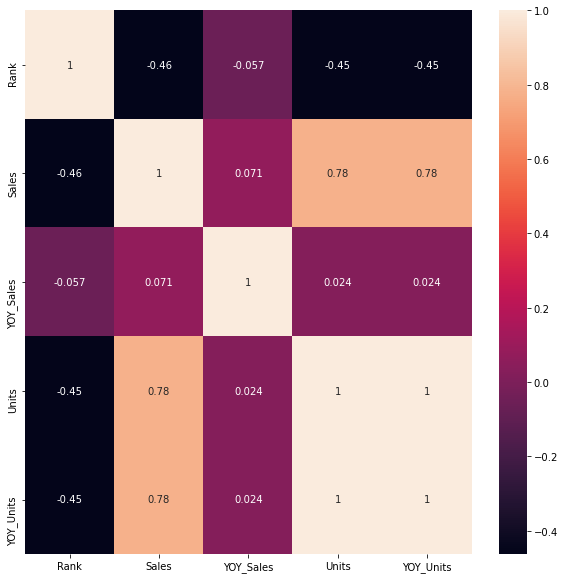

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

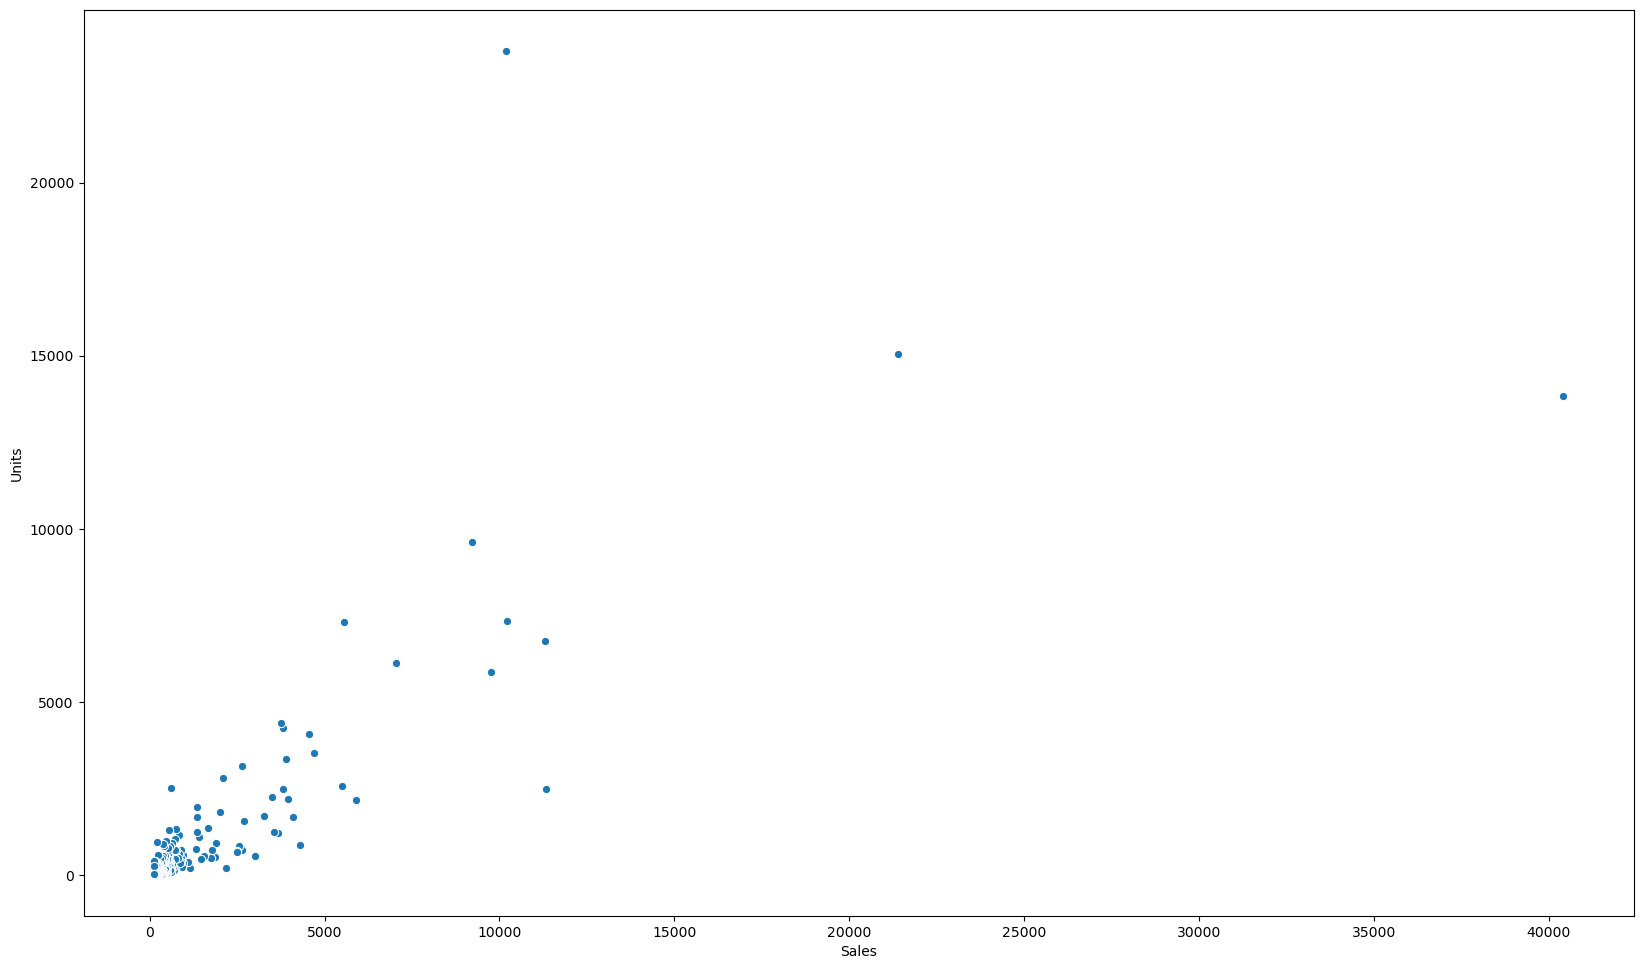

In [18]:
plt.figure(figsize=(20,12),dpi=100)

sns.scatterplot(df["Sales"], df["Units"])
plt.show()




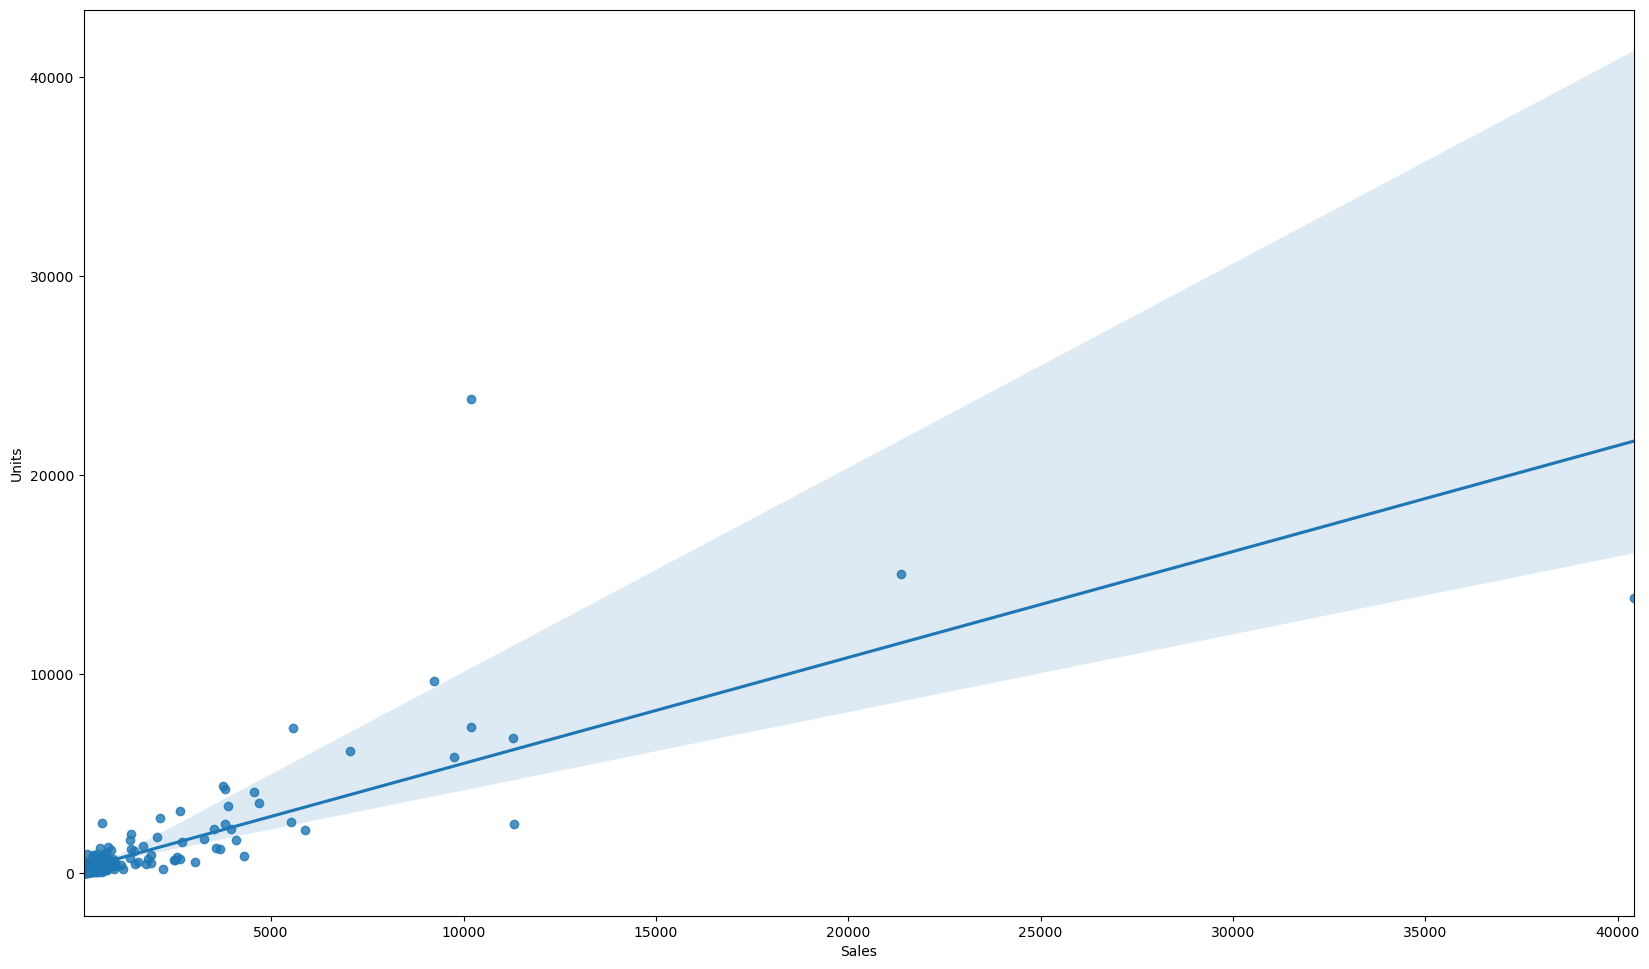

In [19]:
plt.figure(figsize=(20,12),dpi=100)
sns.regplot(df["Sales"], df["Units"])
plt.show()

# we see some outliers here

In [20]:
df. describe()

,Rank,Sales,YOY_Sales,Units,YOY_Units
count,250.000000,250.00000,250.000000,250.000000,250.000000
mean,125.500000,1242.74000,2.938400,850.076000,850.076000
std,72.312977,3365.22882,8.953784,2296.151659,2296.151659
min,1.000000,126.00000,-21.200000,13.000000,13.000000
25%,63.250000,181.00000,-2.375000,85.000000,85.000000
50%,125.500000,330.00000,2.200000,207.000000,207.000000
75%,187.750000,724.75000,6.575000,555.250000,555.250000
max,250.000000,40412.00000,39.500000,23801.000000,23801.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f99c99052b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99c9905970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99c98f7f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99c9912070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99c9912370>],
 'means': []}

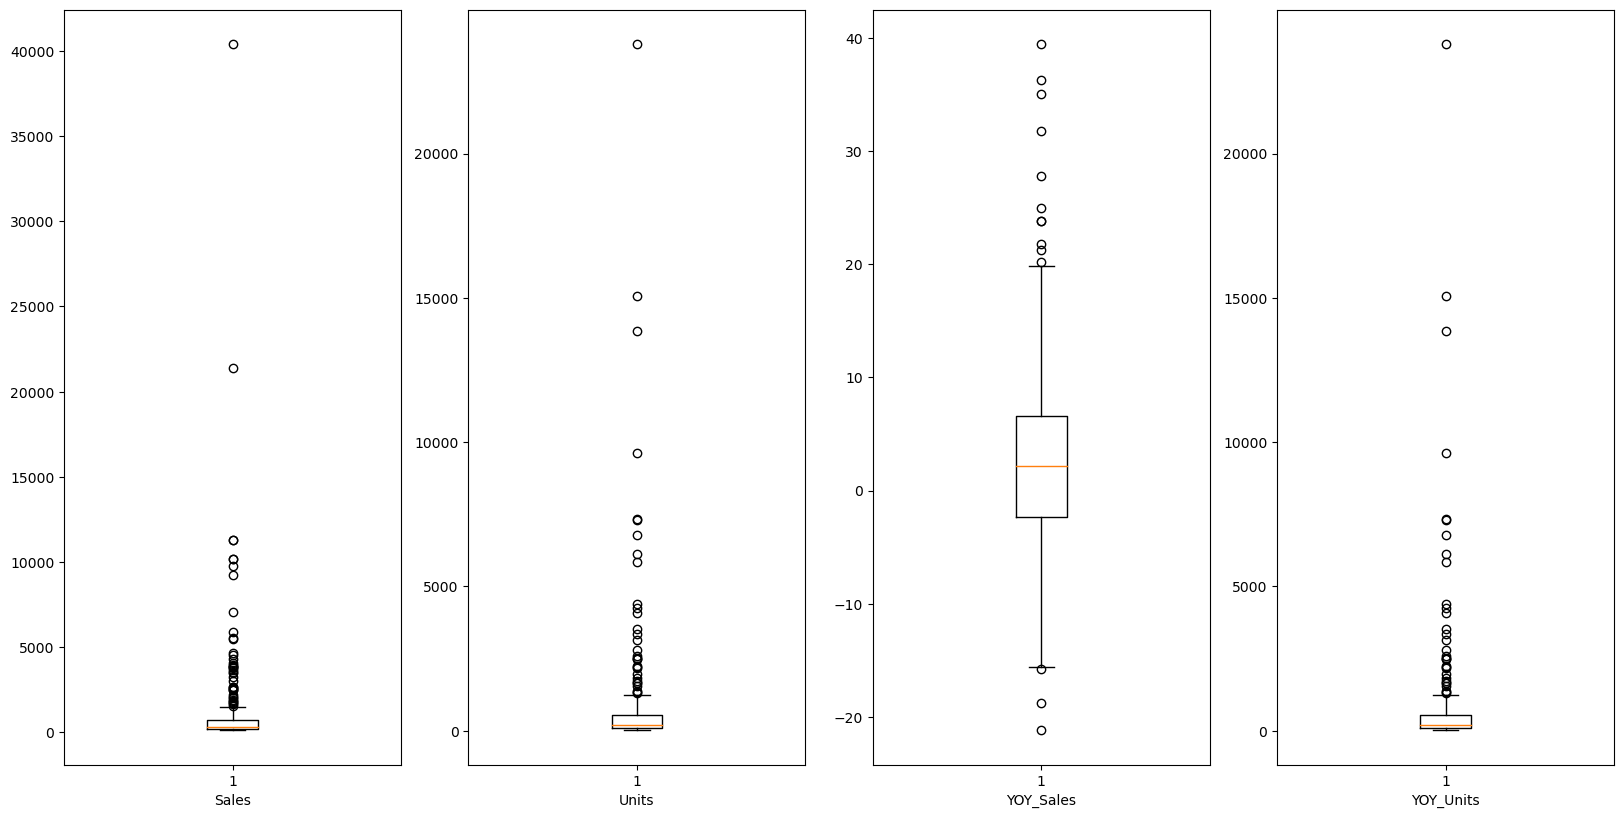

In [21]:
# Lets look at the outliers

plt.figure(figsize=(20,10),dpi=100)

plt.subplot(1,4,1)
plt.xlabel("Sales")
plt.boxplot(df["Sales"])

plt.subplot(1,4,2)
plt.xlabel("Units")
plt.boxplot(df["Units"])

plt.subplot(1,4,3)
plt.xlabel("YOY_Sales")
plt.boxplot(df["YOY_Sales"])

plt.subplot(1,4,4)
plt.xlabel("YOY_Units")
plt.boxplot(df["YOY_Units"])



{'whiskers': [<matplotlib.lines.Line2D at 0x7f99c9f36940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99c9f41040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99c9f365e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99c9f41700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99c9f41a00>],
 'means': []}

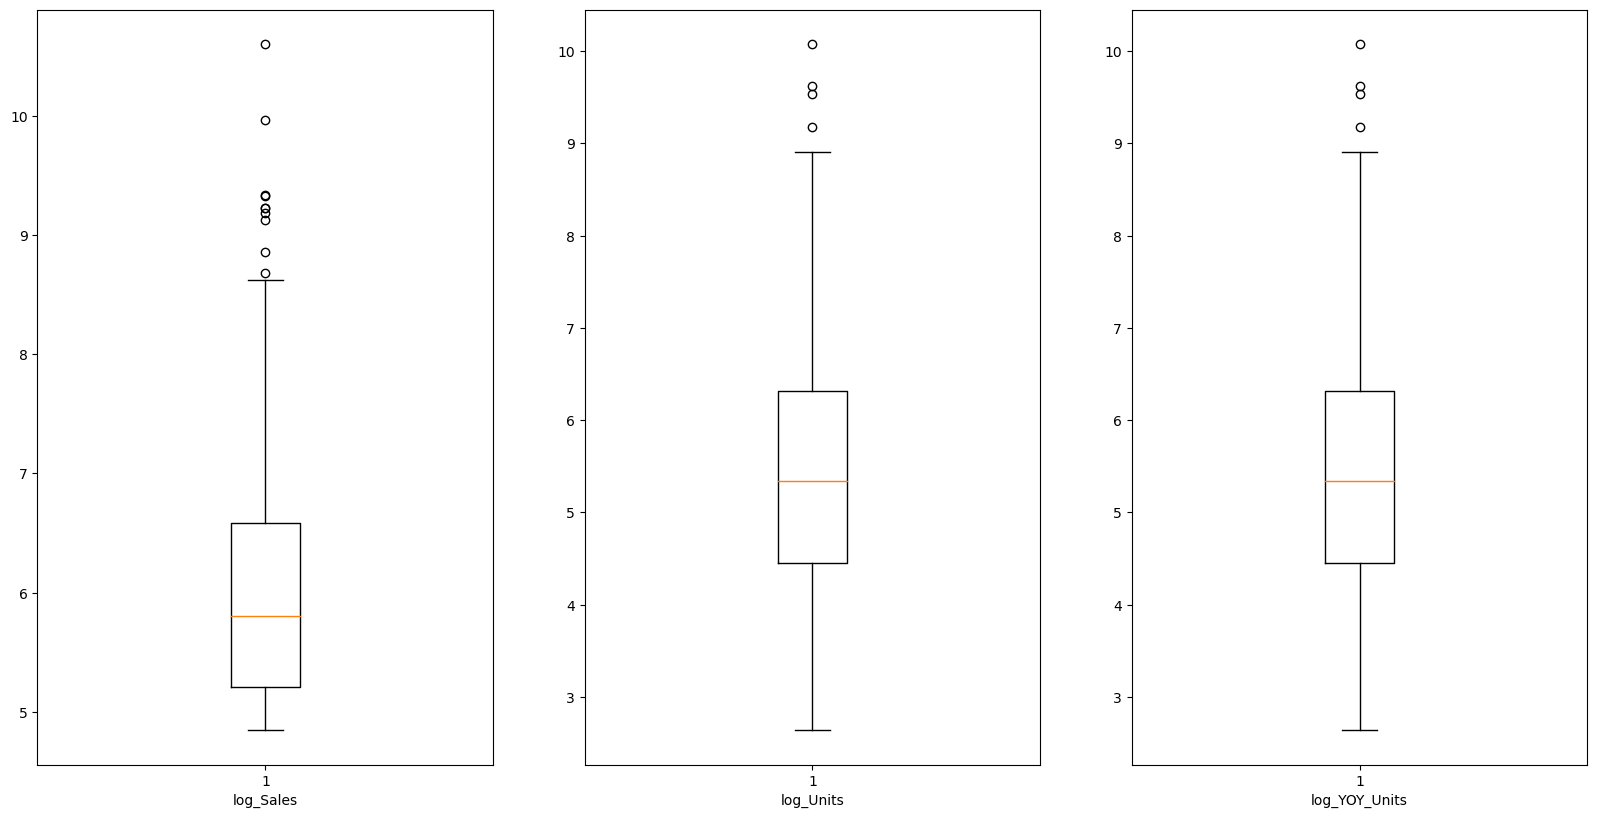

In [22]:
plt.figure(figsize=(20,10),dpi=100)


df["log_Sales"]=np.log(df["Sales"]+1)
plt.subplot(1,3,1)
plt.xlabel("log_Sales")
plt.boxplot(df["log_Sales"])  

df["log_Units"]=np.log(df["Units"]+1)
plt.subplot(1,3,2)
plt.xlabel("log_Units")
plt.boxplot(df["log_Units"]) 

df["log_YOY_Units"]=np.log(df["YOY_Units"]+1)
plt.subplot(1,3,3)
plt.xlabel("log_YOY_Units")
plt.boxplot(df["log_YOY_Units"]) 

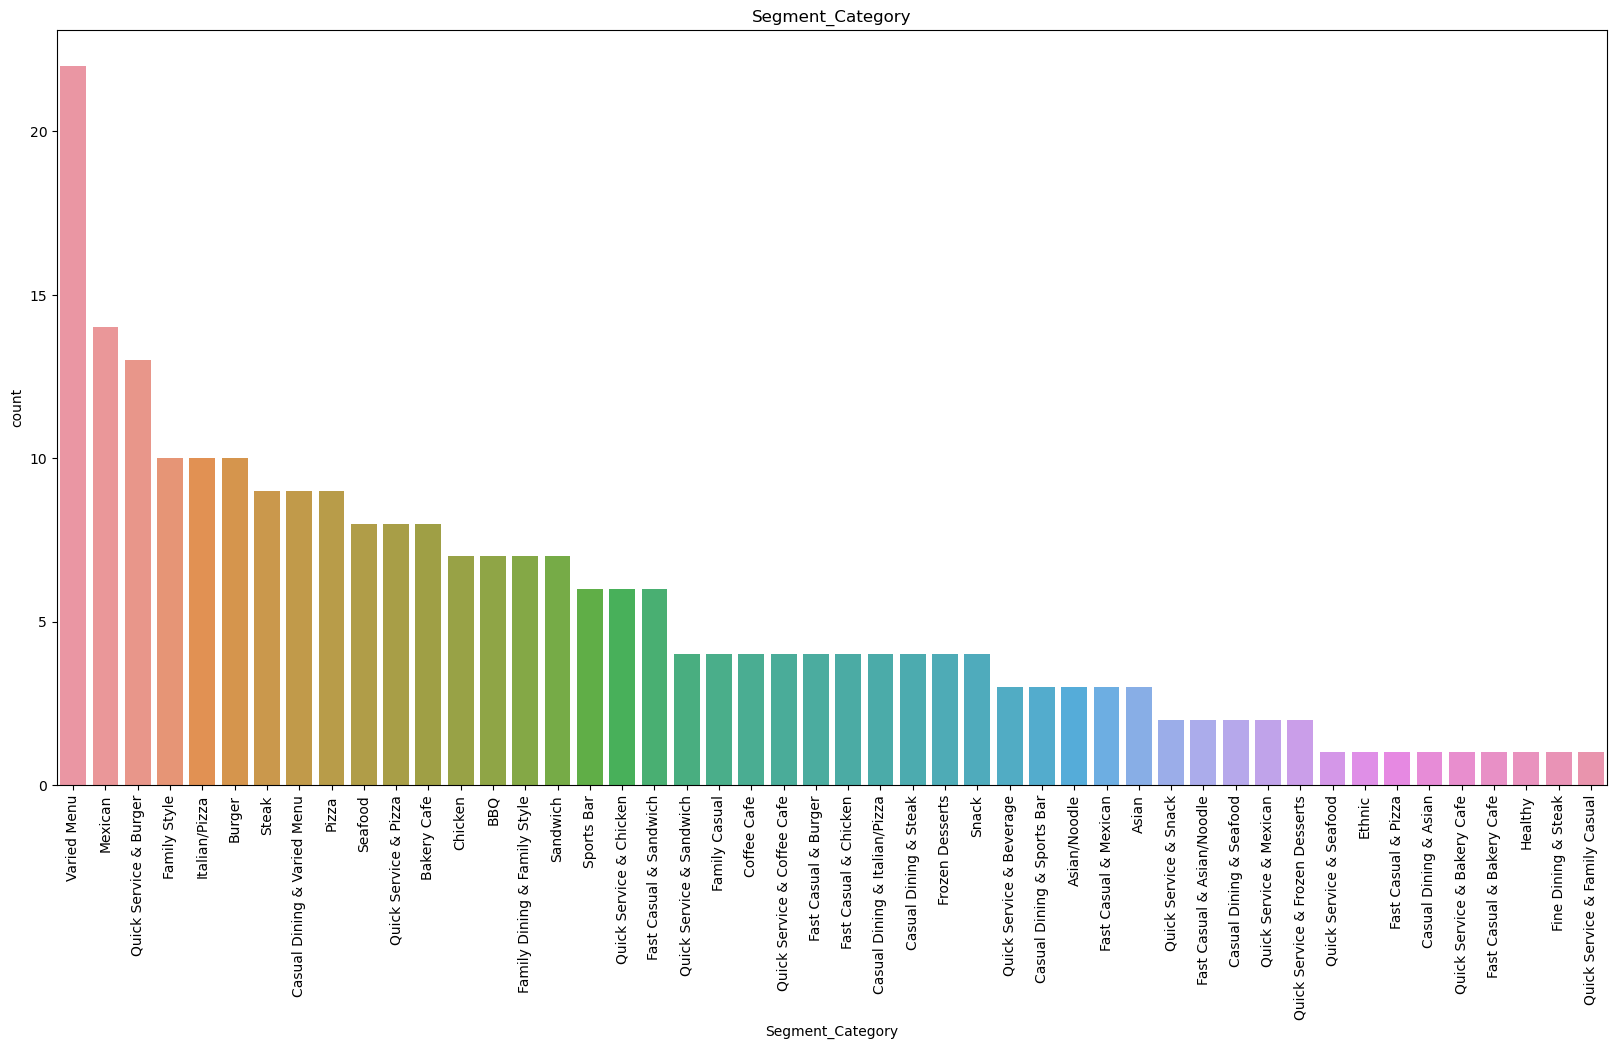

In [31]:
#lets start visiualizing the different colums

plt.figure(figsize=(20,10),dpi=100)
plt.xticks(rotation=90)
plt.title("Segment_Category")
sns.countplot(df["Segment_Category"], order = df["Segment_Category"].value_counts().index);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

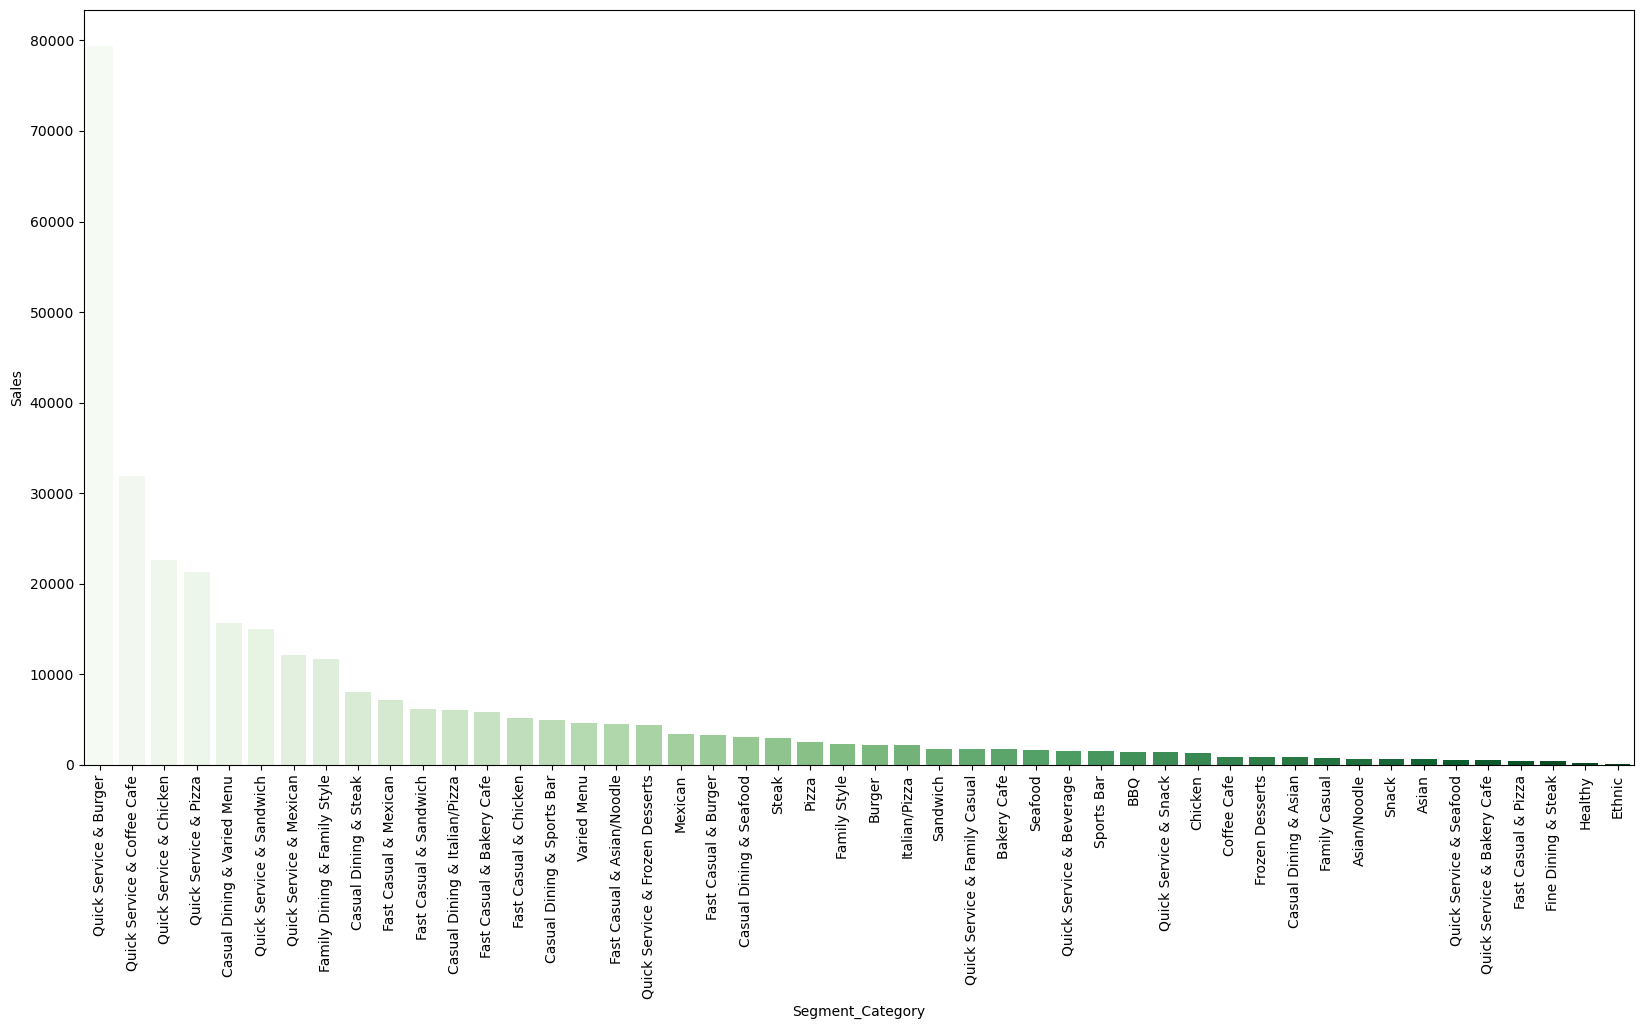

In [50]:
plt.figure(figsize=(20,10), dpi=100)
df_state=df.groupby(["Segment_Category"])["Sales"].sum().sort_values(ascending=False).reset_index()
sns.barplot(df_state["Segment_Category"],df_state["Sales"], palette="Greens")
plt.xticks(rotation=90)




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

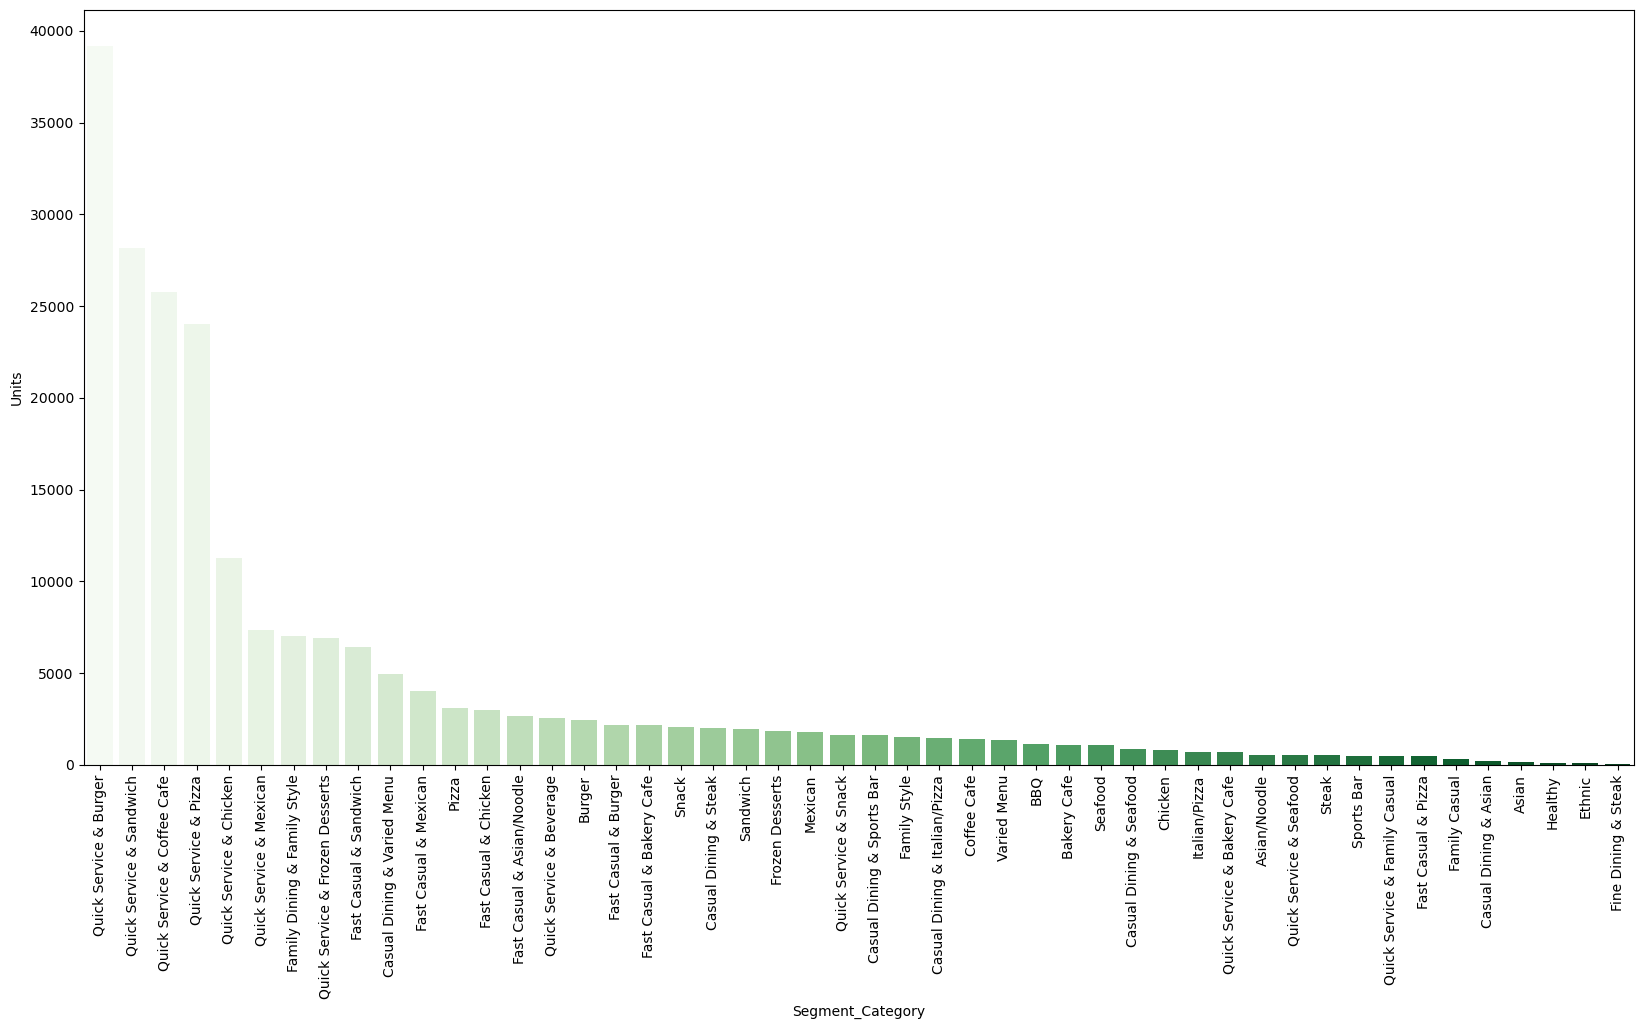

In [52]:
plt.figure(figsize=(20,10), dpi=100)
df_funding=df.groupby(["Segment_Category"])["Units"].sum().sort_values(ascending=False).reset_index()
sns.barplot(df_funding["Segment_Category"], df_funding["Units"], palette="Greens");
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

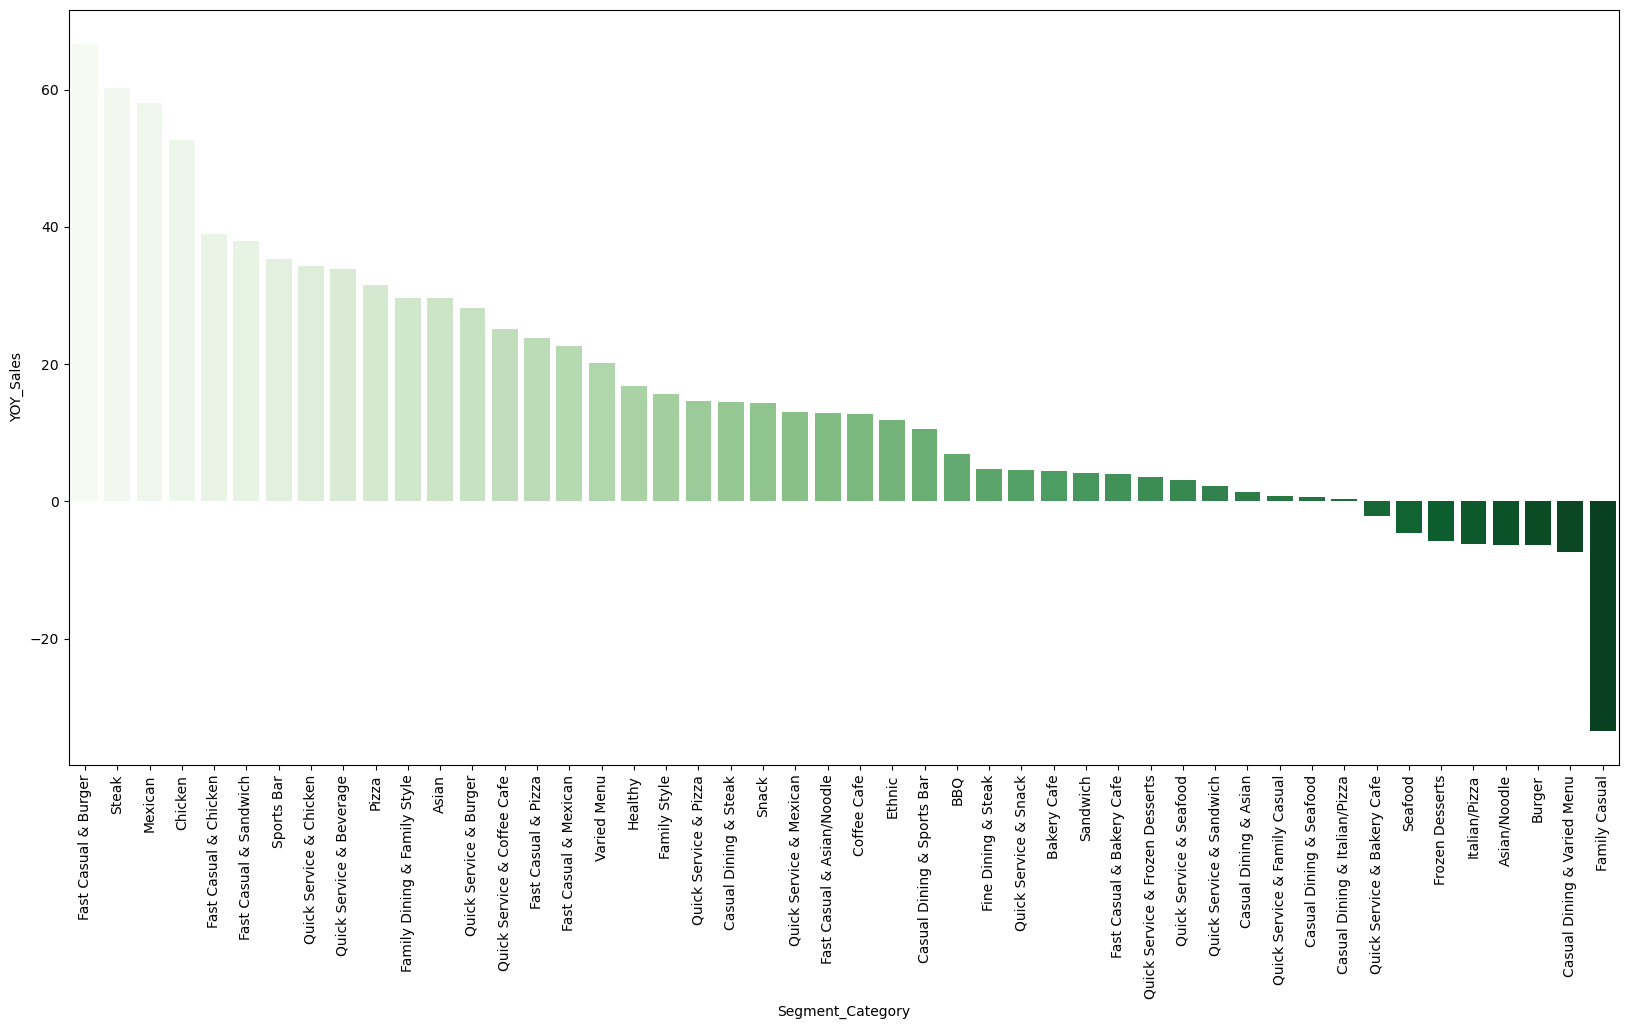

In [53]:
plt.figure(figsize=(20,10), dpi=100)
df_funding=df.groupby(["Segment_Category"])["YOY_Sales"].sum().sort_values(ascending=False).reset_index()
sns.barplot(df_funding["Segment_Category"], df_funding["YOY_Sales"], palette="Greens");
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

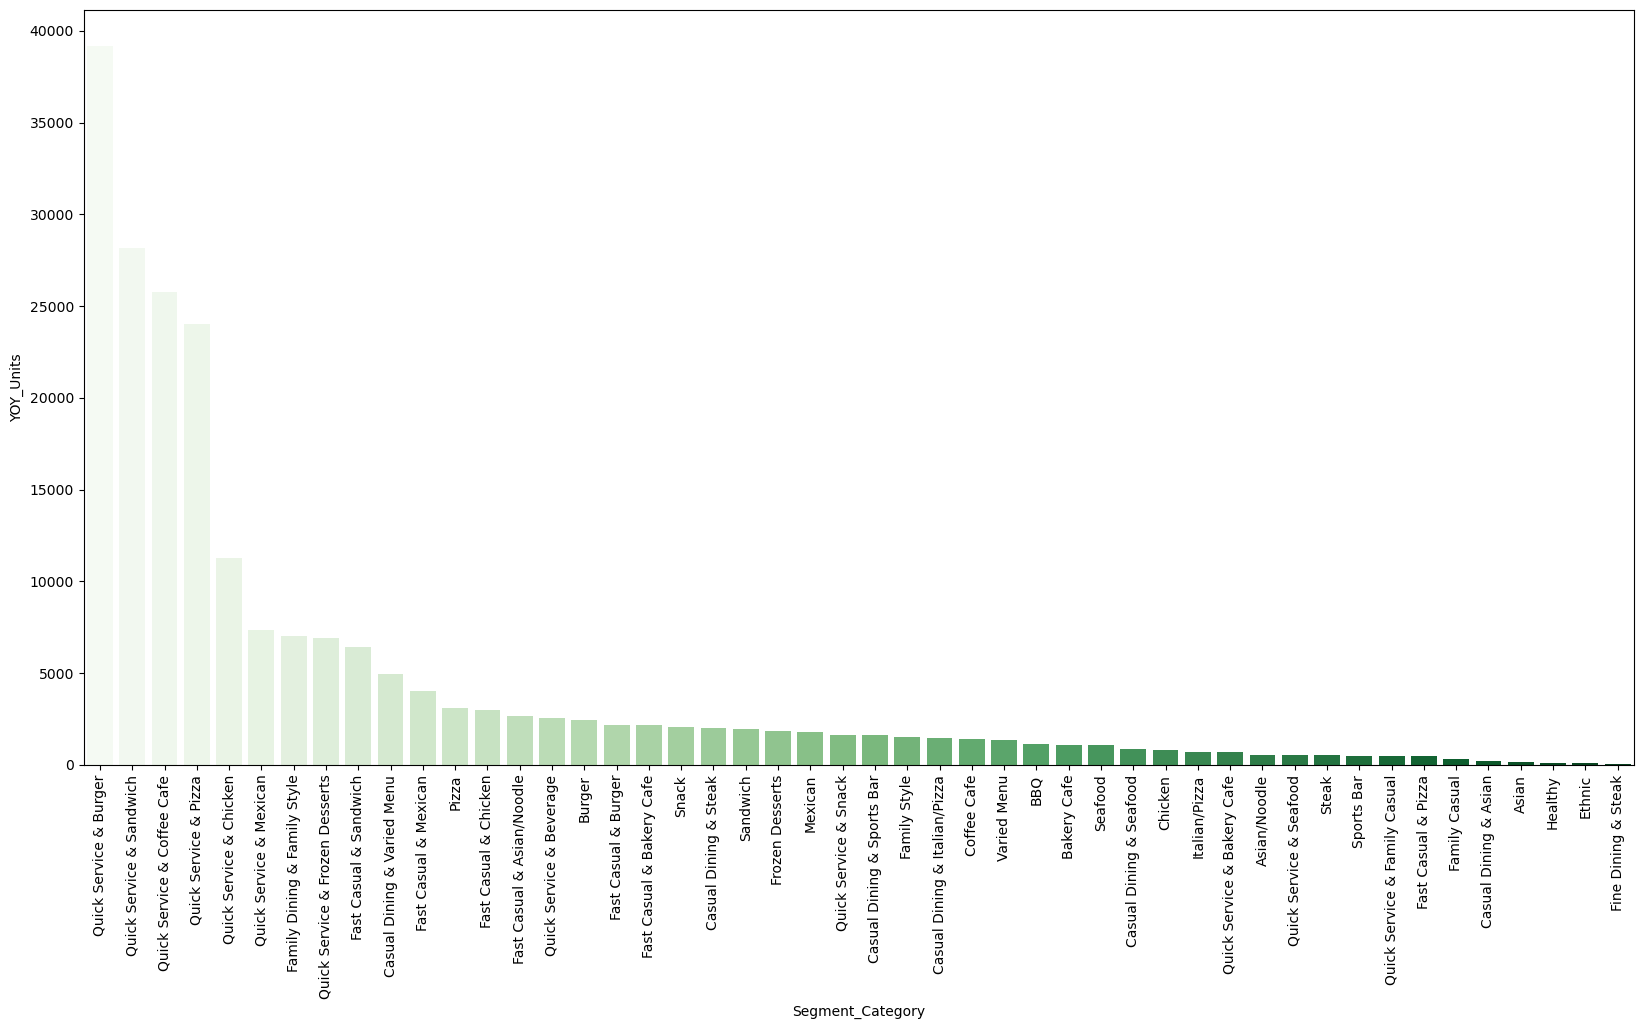

In [54]:
plt.figure(figsize=(20,10), dpi=100)
df_funding=df.groupby(["Segment_Category"])["YOY_Units"].sum().sort_values(ascending=False).reset_index()
sns.barplot(df_funding["Segment_Category"], df_funding["YOY_Units"], palette="Greens");
plt.xticks(rotation=90)

In [4]:
# My hypothesis before I analysed this data set was there would be a increase in quick service food chains. 
# My reasoning behind this was almost all restaurants were closed at some point during the pandemic. 
# The only businesses that did not have to close was drive thru quick service chains. 
# Because they were the only ones open the were able to increase their sales, even though some of the traditional sit down concepts decreased.
# Obviously there was a correlation between sales and units. The more units = higher sales.
# One thing that stood out to me as someone in the retaurant business is the quickserve chicken chains, this has become a very popular sector in the restaurant business in terms of both sales and units. 


